# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [44]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(df_data.shape)
print()
print(df_data.columns)
print()
df_data.info()

(962, 16)

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 n

In [6]:
print("This data ranges from:", df_data.year.min(), "-", df_data.year.max())

This data ranges from: 1901 - 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [7]:
df_data.duplicated().any()

False

### Check for NaN Values

In [8]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [9]:
df_data[df_data.birth_date.isna() == True].head()

year category                       prize motivation prize_share  \
24   1904    Peace  The Nobel Peace Prize 1904        NaN         1/1   
60   1910    Peace  The Nobel Peace Prize 1910        NaN         1/1   
89   1917    Peace  The Nobel Peace Prize 1917        NaN         1/1   
200  1938    Peace  The Nobel Peace Prize 1938        NaN         1/1   
215  1944    Peace  The Nobel Peace Prize 1944        NaN         1/1   

    laureate_type                                          full_name  \
24   Organization  Institut de droit international (Institute of ...   
60   Organization  Bureau international permanent de la Paix (Per...   
89   Organization  Comité international de la Croix Rouge (Intern...   
200  Organization  Office international Nansen pour les Réfugiés ...   
215  Organization  Comité international de la Croix Rouge (Intern...   

    birth_date birth_city birth_country birth_country_current  sex  \
24         NaN        NaN           NaN                   NaN  NaN   
60         NaN        NaN           NaN                   NaN  NaN   
89         NaN        NaN           NaN                   NaN  NaN   
200        NaN        NaN           NaN                   NaN  NaN   
215        NaN        NaN           NaN                   NaN  NaN   

    organization_name organization_city organization_country  ISO  
24                NaN               NaN                  NaN  NaN  
60                NaN               NaN                  NaN  NaN  
89                NaN               NaN                  NaN  NaN  
200               NaN               NaN                  NaN  NaN  
215               NaN               NaN                  NaN  NaN

In [10]:
df_data[df_data.laureate_type == "Organization"].head()

year category                       prize motivation prize_share  \
24   1904    Peace  The Nobel Peace Prize 1904        NaN         1/1   
60   1910    Peace  The Nobel Peace Prize 1910        NaN         1/1   
89   1917    Peace  The Nobel Peace Prize 1917        NaN         1/1   
200  1938    Peace  The Nobel Peace Prize 1938        NaN         1/1   
215  1944    Peace  The Nobel Peace Prize 1944        NaN         1/1   

    laureate_type                                          full_name  \
24   Organization  Institut de droit international (Institute of ...   
60   Organization  Bureau international permanent de la Paix (Per...   
89   Organization  Comité international de la Croix Rouge (Intern...   
200  Organization  Office international Nansen pour les Réfugiés ...   
215  Organization  Comité international de la Croix Rouge (Intern...   

    birth_date birth_city birth_country birth_country_current  sex  \
24         NaN        NaN           NaN                   NaN  NaN   
60         NaN        NaN           NaN                   NaN  NaN   
89         NaN        NaN           NaN                   NaN  NaN   
200        NaN        NaN           NaN                   NaN  NaN   
215        NaN        NaN           NaN                   NaN  NaN   

    organization_name organization_city organization_country  ISO  
24                NaN               NaN                  NaN  NaN  
60                NaN               NaN                  NaN  NaN  
89                NaN               NaN                  NaN  NaN  
200               NaN               NaN                  NaN  NaN  
215               NaN               NaN                  NaN  NaN

In [11]:
# If the prize winner was an organization they will not have birth: date, city, country. 
### Equally, if the prize winner is an individual they wont always have an organization 
### that they're associated with

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [12]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'], format="%Y-%m-%d")
df_data['year'] = pd.to_numeric(df_data['year'], downcast='integer')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int16         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage


In [13]:
percent = []
for value in df_data.prize_share.values:
    ok = list(value)
    perc = int(int(ok[0])/int(ok[2]) * 100)
    percent.append(perc)
df_data["Prize Share %"] = percent
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [14]:
px.pie(data_frame=df_data, names='sex', hole=.5)

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [15]:
df_data.query('sex == "Female"').sort_values('year').head(3)

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  Prize Share %  
18                  NaN  POL             25  
29                  NaN  CZE            100  
51                  NaN  SWE            100

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [16]:
repeat_winners = df_data[df_data.full_name.duplicated() == True]
repeat_winners

year   category                              prize  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
215  1944      Peace         The Nobel Peace Prize 1944   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
62   "in recognition of her services to the advance...         1/1   
215                                                NaN         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
62     Individual                        Marie Curie, née Sklodowska   
215  Organization  Comité international de la Croix Rouge (Intern...   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
62  1867-11-07        Warsaw   Russian Empire (Poland)   
215        NaT           NaN                       NaN   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
62                     Poland  Female   
215                       NaN     NaN   
340  United States of America    Male   
348                       NaN     NaN   
424  United States of America    Male   
505            United Kingdom    Male   
523                       NaN     NaN   

                                organization_name organization_city  \
62                            Sorbonne University             Paris   
215                                           NaN               NaN   
340  California Institute of Technology (Caltech)      Pasadena, CA   
348                                           NaN               NaN   
424                        University of Illinois        Urbana, IL   
505           MRC Laboratory of Molecular Biology         Cambridge   
523                                           NaN               NaN   

         organization_country  ISO  Prize Share %  
62                     France  POL            100  
215                       NaN  NaN            100  
340  United States of America  USA            100  
348                       NaN  NaN             50  
424  United States of America  USA             33  
505            United Kingdom  GBR             25  
523                       NaN  NaN            100

In [17]:
repeat_winners["full_name"].values

array(['Marie Curie, née Sklodowska',
       'Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling',
       'Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'John Bardeen', 'Frederick Sanger',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype=object)

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [18]:
category = df_data["category"].value_counts()
category

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [19]:
px.bar(x=category.index,y=category.values, color=category.values, color_continuous_scale='Aggrnyl')


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [20]:
df_data.query('category == "Economics"').sort_values('year').head(3)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  Prize Share %  
393               Netherlands  NLD             50  
394                    Norway  NOR             50  
402  United States of America  USA            100

In [21]:
df_data.query('category == "Economics"').sort_values('year').head(1)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   

    organization_city organization_country  ISO  Prize Share %  
393         Rotterdam          Netherlands  NLD             50

In [22]:
df_data.query('category == "Economics"').sort_values('category').head(1)["full_name"]

393    Jan Tinbergen
Name: full_name, dtype: object

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [23]:
mvw = df_data.groupby(['category','sex'], as_index=False).agg({'prize': pd.Series.count})\
            .sort_values('prize', ascending=False)
mvw

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [24]:

men_v_women = px.bar(x=mvw.category, y=mvw.prize, color=mvw.sex, 
                     title="Number of Prizes Awarded per Category split by Men and Women",
                    labels={'x':"Nobel Prize Category", 'y':"Number of Prizes"})

men_v_women

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [25]:
prize_per_year = df_data['year'].value_counts().sort_index()

In [26]:
rolling = prize_per_year.rolling(window=5).mean()

In [27]:
year5 = np.linspace(start=1900,stop=2020, num=25, dtype=int)
year5

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

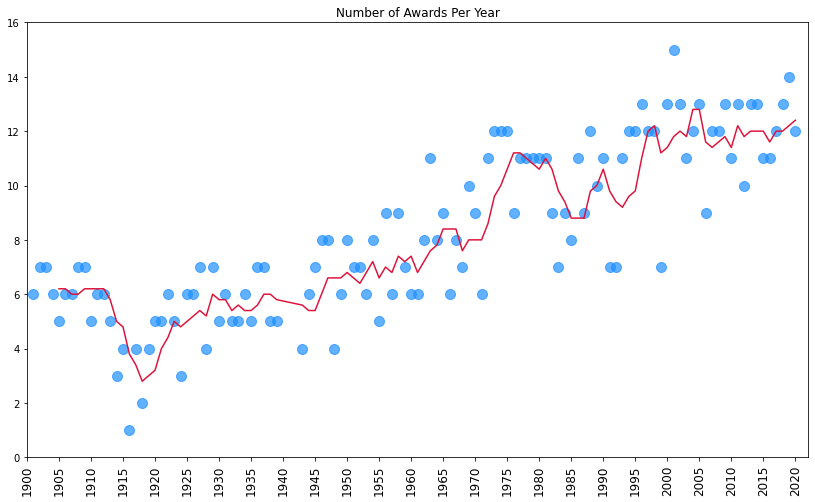

In [28]:
plt.figure(figsize=(14,8))
plt.scatter(x=prize_per_year.index, y=prize_per_year.values, alpha=.7, s=100,c="dodgerblue")
plt.plot(prize_per_year.index,rolling,c="crimson")
plt.title("Number of Awards Per Year")
plt.xlim(1900,2022)
plt.xticks(ticks=year5,rotation=90,size=12)
plt.ylim(0,16)
plt.show()


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [29]:
prize_share = df_data.groupby(["year"], as_index=False).agg({'Prize Share %':pd.Series.mean})
rolling = prize_share['Prize Share %'].rolling(window=5).mean()
prize_share

year  Prize Share %
0    1901          83.33
1    1902          71.43
2    1903          71.43
3    1904          83.33
4    1905         100.00
..    ...            ...
112  2016          54.45
113  2017          49.83
114  2018          46.15
115  2019          42.64
116  2020          49.92

[117 rows x 2 columns]

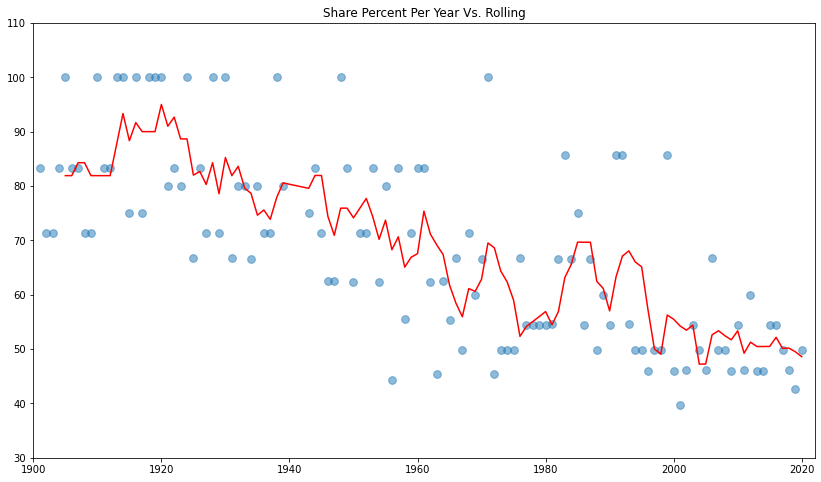

In [30]:
plt.figure(figsize=(14,8))
plt.scatter(x=prize_share.year, y=prize_share["Prize Share %"], alpha=.5, s=60)
plt.plot(prize_share.year,rolling, color="red")
plt.title("Share Percent Per Year Vs. Rolling")
plt.xlim(1900,2022)
# plt.xticks(ticks=year5,rotation=90,size=12)
plt.ylim(30,110)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [31]:
top20 = pd.DataFrame(df_data["birth_country_current"].value_counts().head(20))
top20.reset_index(inplace=True)
top20.rename(columns={'index':"birth_country_current","birth_country_current":"total_prize"}, inplace=True)

In [32]:
px.bar(y=np.flip(top20.index),x=np.flip(top20.values),orientation="h", color=np.flip(top20.values),
      title="Top 20 Countries by Award Counts",labels={'x':"Total Awards", 'y':"Country"},
       color_continuous_scale="Viridis")\
      .update_layout(showlegend=False)

ValueError: All arguments should have the same length. The length of argument `wide_variable_0` is 2, whereas the length of  previously-processed arguments ['y'] is 20

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [ ]:

top20["code"] = ["USA","GBR", 'DEU', 'FRA', 'SWE',"POL","JPN","RUS","CAN","CHE","ITA","AUT","NLD",
                 "DNK","NOR","CHN","AUS","ZAF","BEL","HUN"]
top20

In [ ]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Choropleth(
    locations = top20['code'],
    z = top20['birth_country_current'],
    text = top20.index,
    colorscale = 'Plasma',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Nobel Prizes Received by Country',
))

fig.update_layout(
    title_text='Nobel Prizes By Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [33]:
cat_country = df_data.groupby(["birth_country_current","category"], as_index=False).agg({"prize":pd.Series.count})
cat_country.sort_values(by="prize", ascending=False,inplace=True)
cat_country

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [34]:
merged_df = pd.merge(cat_country,top20, on="birth_country_current")
merged_df.sort_values('total_prize', inplace=True)
merged_df.head(15)

birth_country_current    category  prize  total_prize
91           South Africa   Chemistry      1            9
88           South Africa       Peace      3            9
89           South Africa    Medicine      3            9
90           South Africa  Literature      2            9
101               Hungary  Literature      1            9
100               Hungary   Economics      1            9
99                Hungary    Medicine      2            9
98                Hungary     Physics      2            9
97                Hungary   Chemistry      3            9
96                Belgium     Physics      1            9
95                Belgium  Literature      1            9
94                Belgium   Chemistry      1            9
93                Belgium    Medicine      3            9
92                Belgium       Peace      3            9
54              Australia   Chemistry      1           10

In [35]:
px.bar(x=merged_df.prize, y=merged_df.birth_country_current, 
       color=merged_df.category, orientation="h", title="Top 20 Countries by num of Prizes per Cat")

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [36]:
ppy = df_data.groupby(['birth_country_current','year'],as_index=False).count()
ppy = ppy.sort_values("year")[['year','birth_country_current','prize']]

In [37]:
cumulative_prizes = ppy.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [38]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [39]:
orgs = df_data.dropna()
orgs = orgs.groupby('organization_name', as_index=False).agg({"prize":pd.Series.count})\
        .sort_values("prize",ascending=True).tail(20)

In [40]:
orgs

organization_name  prize
67                         Harvard Medical School      7
191                     University College London      7
108                             London University      7
79                               Institut Pasteur      7
40                             Cornell University      8
12                              Bell Laboratories      8
255                               Yale University      9
110           MRC Laboratory of Molecular Biology     10
219                          University of Oxford     12
118                           Max-Planck-Institut     13
151                        Rockefeller University     13
145                          Princeton University     15
38                            Columbia University     16
26   California Institute of Technology (Caltech)     16
195                       University of Cambridge     18
196                         University of Chicago     20
116   Massachusetts Institute of Technology (MIT)     21
166                           Stanford University     23
68                             Harvard University     28
194                      University of California     40

In [52]:
px.bar(data_frame=orgs, x="prize", y="organization_name",color='prize', color_continuous_scale="Plasma", 
        labels={'prize':'Number of Prizes','organization_name':'Research Institute'})

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [62]:
cities = df_data.groupby('organization_city', as_index=False).agg({'prize':pd.Series.count})
cities = cities.sort_values('prize').tail(20)

In [63]:
px.bar(data_frame=cities, x="prize", y="organization_city",color='prize', color_continuous_scale="Plasma", 
        labels={'prize':'Number of Prizes','organization_city':'Cities of Discovery'})

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [ ]:
cities = df_data.groupby('birth_city', as_index=False).agg({'prize':pd.Series.count})
cities = cities.sort_values('prize').tail(20)

In [61]:
px.bar(data_frame=cities, x="prize", y="birth_city",color='prize', color_continuous_scale="Plasma", 
        labels={'prize':'Number of Prizes','birth_city':'Cities of Discovery'})

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [72]:
sun_burst = df_data.groupby(["organization_country",'organization_city','organization_name'], as_index=False)\
            .agg({'prize': pd.Series.count})
sun_burst = sunburst.sort_values(["organization_country",'organization_city','organization_name'])
sun_burst

organization_country     organization_city  \
0                   Argentina          Buenos Aires   
1                   Argentina          Buenos Aires   
2                   Australia              Canberra   
3                   Australia             Melbourne   
4                   Australia              Nedlands   
..                        ...                   ...   
286  United States of America    West Lafayette, IN   
287  United States of America        Wilmington, DE   
288  United States of America        Woods Hole, MA   
289  United States of America         Worcester, MA   
290  United States of America  Yorktown Heights, NY   

                                     organization_name  prize  
0                   Institute for Biochemical Research      1  
1    Instituto de Biologia y Medicina Experimental ...      1  
2                       Australian National University      1  
3    Walter and Eliza Hall Institute for Medical Re...      1  
4    NHMRC Helicobacter pylori Research Laboratory,...      1  
..                                                 ...    ...  
286                                  Purdue University      2  
287                                            Du Pont      1  
288                 Marine Biological Laboratory (MBL)      1  
289         University of Massachusetts Medical School      1  
290               IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [78]:
px.sunburst(data_frame=sun_burst, path=["organization_country",'organization_city','organization_name'],
            values="prize",width=800,height=800).show()


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [241]:
df_data['winning_age']= df_data["year"].values - df_data['birth_date'].dt.year

In [242]:
age = df_data.groupby('winning_age', as_index=False).agg({'prize':pd.Series.count}).sort_values('winning_age')

In [244]:
print(age.describe())
age

       winning_age  prize
count        64.00  64.00
mean         60.39  14.59
std          19.41  10.00
min          17.00   1.00
25%          44.75   5.75
50%          60.50  13.50
75%          76.25  22.25
max          97.00  35.00


winning_age  prize
0         17.00      1
1         25.00      2
2         31.00      4
3         32.00      4
4         33.00      4
..          ...    ...
59        88.00      2
60        89.00      2
61        90.00      1
62        96.00      1
63        97.00      1

[64 rows x 2 columns]

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [117]:
df_data[df_data.winning_age == df_data.winning_age.min()]


year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  Prize Share %  winning_age  
885                  NaN  PAK             50        17.00

In [118]:
df_data[df_data.winning_age == df_data.winning_age.max()]

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  Prize Share %  winning_age  
937  United States of America  DEU             33        97.00

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  


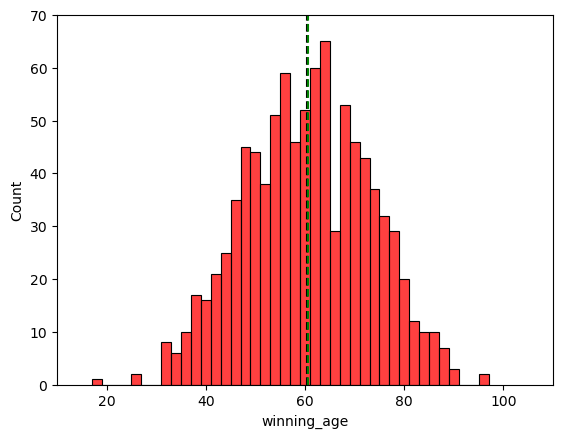

In [205]:

hist = sns.histplot(data=df_data,x='winning_age', bins=40,color="red", fill=True, label="Age when rewarded")
plt.plot(np.repeat(age.winning_age.mean(),100),range(100),color="black", linestyle="dashed", label='mean')
plt.plot(np.repeat(age.winning_age.median(),100),range(100),color="green", linestyle="dashed", label='median')
hist.set(xlim=(10,110),ylim=(0,70))

plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


In [210]:
age = df_data.groupby(['year','winning_age'], as_index=False).agg({'prize':pd.Series.count}).sort_values('year')

(15.0, 100.0)

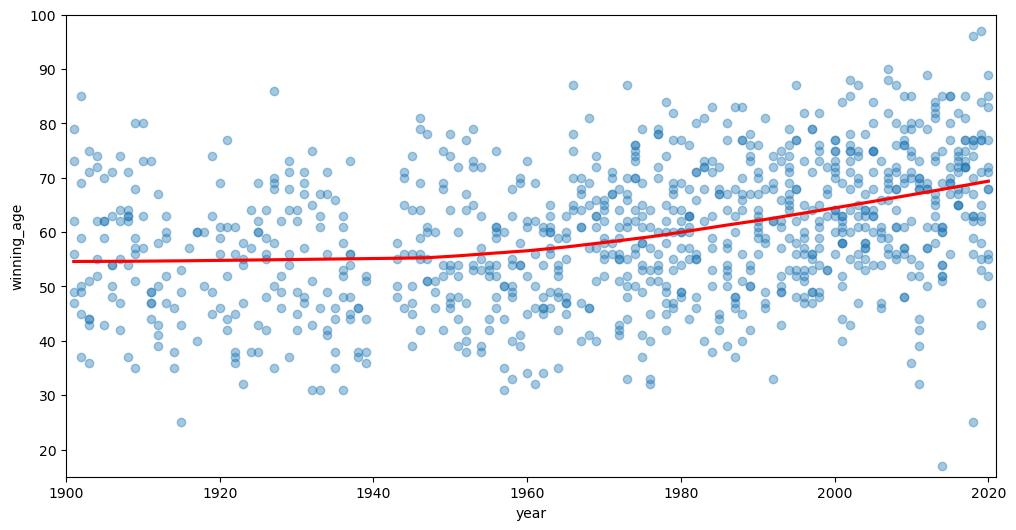

In [250]:
# avg_age = age.groupby('year', as_index=False).agg({'winning_age': pd.Series.mean})
plt.figure(figsize=(12,6))
sns.regplot(x=df_data.year, y=df_data.winning_age, lowess=True, scatter_kws={'alpha':.4},line_kws={'color':'red'})
plt.xlim(1900,2021)
plt.ylim(15,100)

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [226]:
age_cat = df_data.groupby(['category','winning_age'], as_index=False).agg({'prize':pd.Series.count}).sort_values('category')

<AxesSubplot:xlabel='category', ylabel='winning_age'>

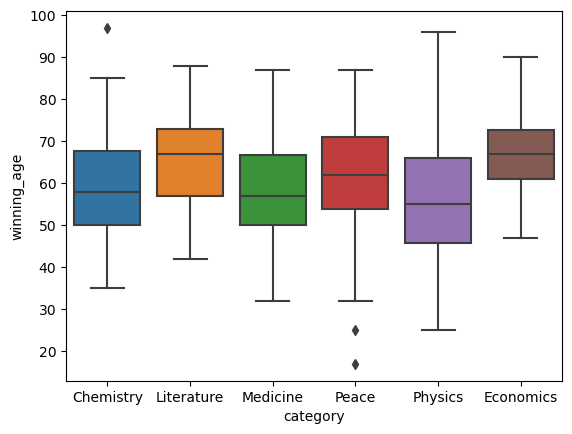

In [258]:
sns.boxplot(data=df_data, x='category', y='winning_age')

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 1200x600 with 0 Axes>

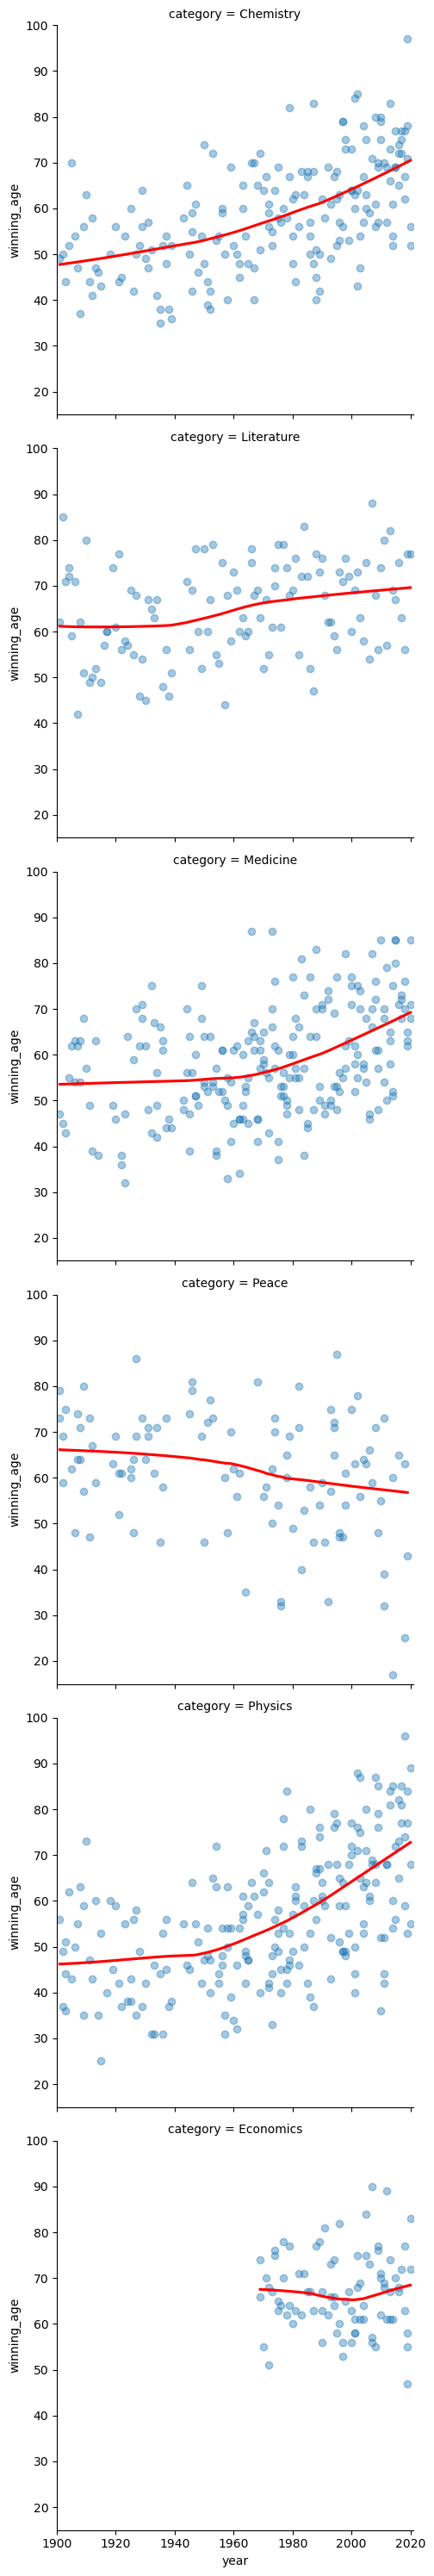

In [264]:
plt.figure(figsize=(12,6))
sns.lmplot(data=df_data, row="category", x='year', y="winning_age", lowess=True, scatter_kws={'alpha':.4},line_kws={'color':'red'})
plt.xlim(1900,2021)
plt.ylim(15,100)
plt.show()

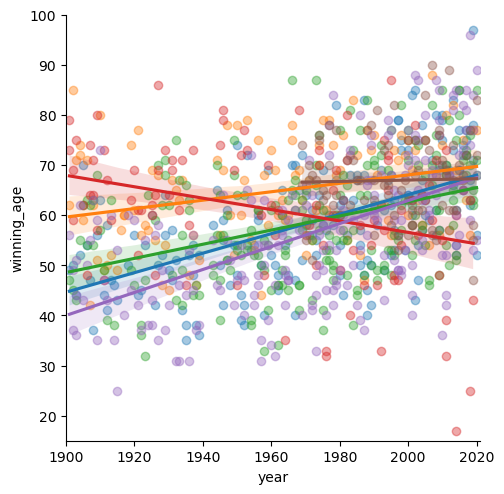

In [268]:

sns.lmplot(data=df_data, hue="category", x='year', y="winning_age", scatter_kws={'alpha':.4})
plt.xlim(1900,2021)
plt.ylim(15,100)
plt.show()